In [1]:
#"/media/hdd2/shailja/RobustReebGraphAD/streamlines/SCP_left.trk"
import dipy.segment.bundles as dsb
import nibabel as nib
import numpy as np
from dipy.io.streamline import load_tractogram, save_tractogram
import nibabel as nib
import networkx as nx
import matplotlib.pyplot as plt
import robustReebConstruction_avg_loc_qb12 as rc
import os
import pickle
import networkx as nx
import visualization as vis
from mpl_toolkits.mplot3d import Axes3D

In [19]:
def graph_vis(G, node_loc, streamlines):
    # 3d spring layout
    pos = node_loc
    # Extract node and edge positions from the layout
    node_xyz = np.array([pos[v] for v in sorted(G)])
    edge_xyz = np.array([(pos[u], pos[v]) for u, v in G.edges()])

    # Create the 3D figure
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(111, projection="3d")

    # Plot the nodes - alpha is scaled by "depth" automatically
    ax.scatter(*node_xyz.T, s=100, ec="w",label = None)
    for i in range(len(streamlines)):
        xdata = []
        ydata = []
        zdata = []
        for j in streamlines[i]:
            xdata.append(j[0])
            ydata.append(j[1])
            zdata.append(j[2])
        ax.plot3D(xdata,ydata,zdata,color= '#eb7a30', lw = 2, alpha = 0.05);
    # Plot the nodes
    ax.scatter(*node_xyz.T, s=400, ec="w", color = 'r', zorder=100)
    edge_labels = nx.get_edge_attributes(G, "weight")
    # Plot the edges
    weight_labels = list(edge_labels.values())
    count = 0
    for vizedge in edge_xyz:
        wt = weight_labels[count]/max(weight_labels)*5
        ax.plot(*vizedge.T, color='#000000',
                lw = wt,
                zorder = 50,
               label = str(weight_labels[count]))
        count+=1


    def _format_axes(ax):
        """Visualization options for the 3D axes."""
        # Turn gridlines off
        ax.grid(False)
        # Suppress tick labels
        for dim in (ax.xaxis, ax.yaxis, ax.zaxis):
            dim.set_ticks([])
        # Set axes labels
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.set_zlabel("z")


    _format_axes(ax)
    fig.tight_layout()
    plt.axis("off")
   
#     plt.legend()
    plt.show()

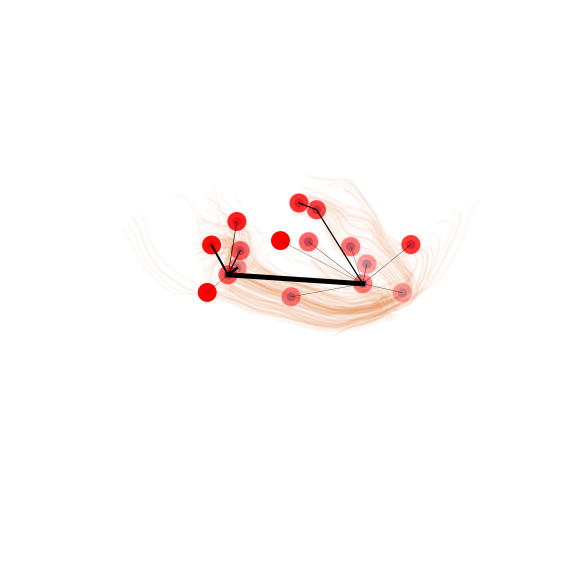

SCP_right.trk 16


<Figure size 432x288 with 0 Axes>

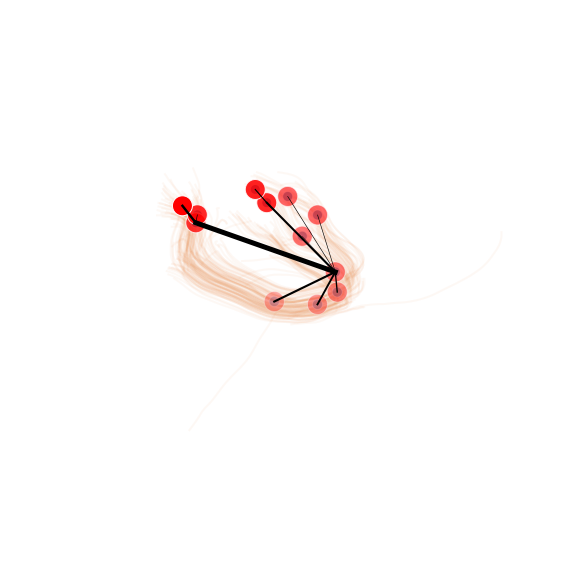

SCP_right.trk 12


<Figure size 432x288 with 0 Axes>

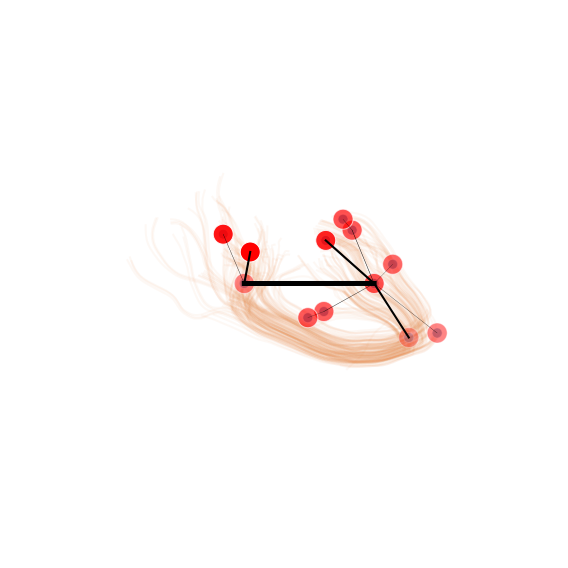

SCP_right.trk 12


<Figure size 432x288 with 0 Axes>

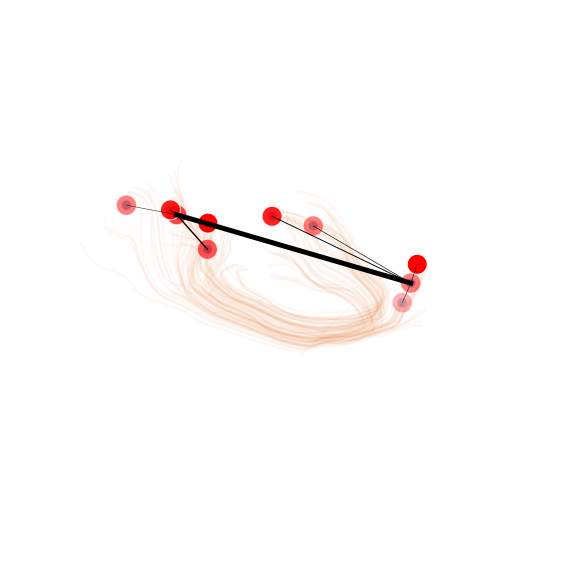

SCP_right.trk 10


<Figure size 432x288 with 0 Axes>

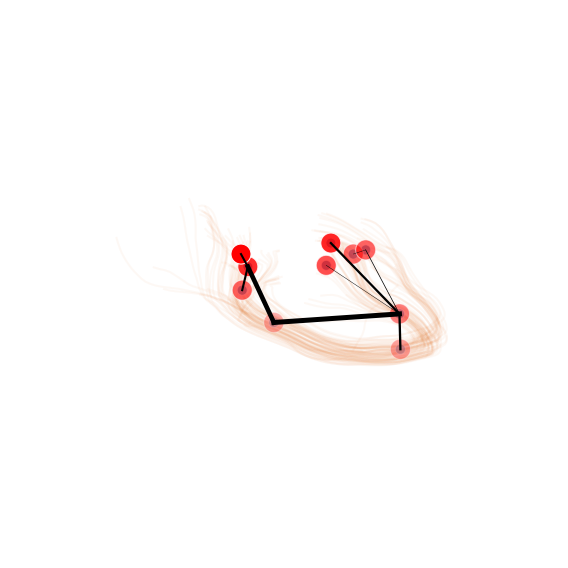

SCP_right.trk 10


<Figure size 432x288 with 0 Axes>

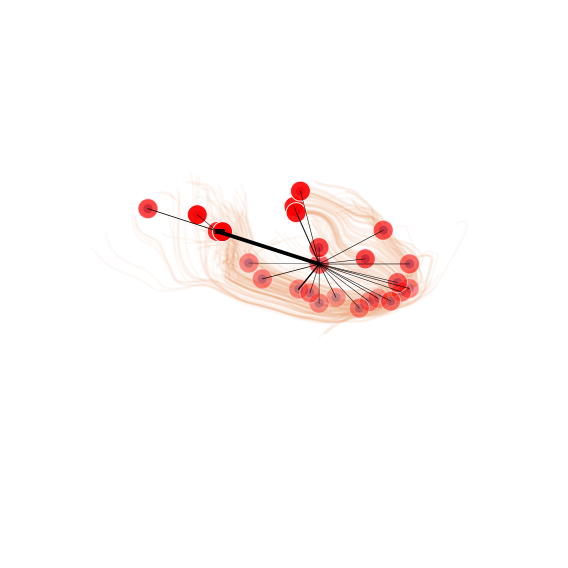

SCP_right.trk 25


<Figure size 432x288 with 0 Axes>

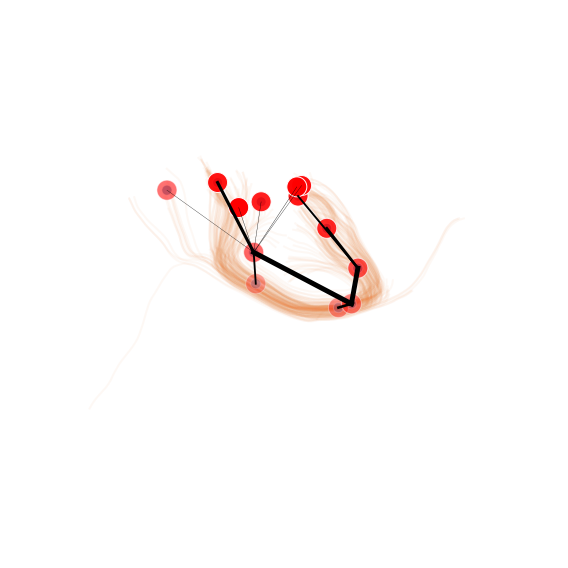

SCP_right.trk 13


<Figure size 432x288 with 0 Axes>

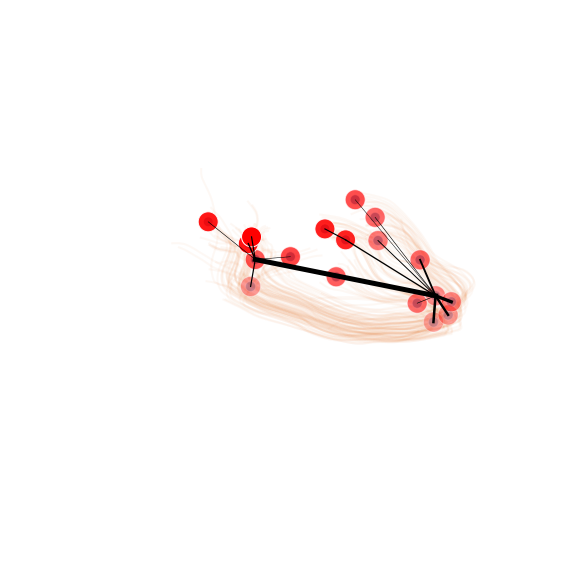

SCP_right.trk 18


<Figure size 432x288 with 0 Axes>

In [21]:

# tracts = os.listdir(trkpathI)
for i in range(10):
    try:
    
        p_streamlines =  nib.streamlines.load("/media/hdd2/shailja/Crash/sphere1brush6/sub-3058s_ses-"+str(i)+"_DSI_mc.src.gz.odf8.f5rec.gqi.1.25.cc.trk.gz")
        streamlines = p_streamlines.streamlines
        eps = 2.5
        delta = 3
        tau = 5
        h, node_loc,cluster_edge= rc.constructRobustReeb(streamlines, eps=eps, delta = delta, tau = tau)
        graph_vis(h,node_loc,streamlines)
        
        plt.savefig(str(i)+"eps"+str(eps)+"delta"+str(delta)+"tau"+str(tau)+file+".png", dpi=300)
        print(file, len(h.nodes()))
    except:
        pass
# vis.visualizeReebNodes(streamlines,h,node_loc)

In [7]:
%%time
trkpathI = "/media/hdd2/shailja/RobustReebGraphAD/streamlines/"
# tracts = ["OR_right.trk","CST_left.trk","SLF_right.trk","SLF_left.trk","ILF_left.trk","CST_right.trk","ILF_right.trk","Cingulum_left.trk","Cingulum_right.trk","MCP.trk"]
tracts = ["CP.trk","CA.trk","SCP_right.trk","SCP_left.trk","POPT_right.trk","POPT_left.trk","ICP_right.trk","ICP_left.trk","FPT_left.trk","Fornix.trk","UF_left.trk","UF_right.trk","FPT_right.trk","OR_left.trk"]
for file in tracts:
    count = 0
    p_streamlines =  nib.streamlines.load(trkpathI+file)
    streamlines = p_streamlines.streamlines
    eps = 2.5
    delta = 3
    tau = 10
    for s in streamlines:
        count+=len(s)
    print(file,count)
#     h, node_loc,cluster_edge= rc.constructRobustReeb(streamlines, eps=eps, delta = delta, tau = tau)
#     graph_vis(h,node_loc,streamlines)
#     print(file, len(h.nodes()))
# vis.visualizeReebNodes(streamlines,h,node_loc)

CP.trk 27377
CA.trk 43710
SCP_right.trk 109718
SCP_left.trk 126080
POPT_right.trk 167504
POPT_left.trk 238822
ICP_right.trk 205135
ICP_left.trk 253758
FPT_left.trk 301010
Fornix.trk 338234
UF_left.trk 470120
UF_right.trk 523996
FPT_right.trk 537231
OR_left.trk 594836
CPU times: user 2.77 s, sys: 1.36 s, total: 4.12 s
Wall time: 1.15 s


In [ ]:
%%time
import netrd
import siminet as sn
from functools import partial

def annotate_graph(graph, node_positions):
    for e in graph.edges:
        n1, n2 = e
        pos1, pos2 = np.array(node_positions[n1]), np.array(node_positions[n2])
        graph.nodes[n1]["position"] = pos1
        graph.nodes[n2]["position"] = pos2
        graph.edges[e]["distance"] = np.linalg.norm(pos1 - pos2)
        
def merge_equivalent(graph, node_annotations):
    """
    Intakes a graph and its associated node annotations where some nodes may have the same annotation (spatial position). 
    Those equivalent nodes will be merged into the same node, and edges involving these equivalent nodes will be inherited 
    by the final node.
    """
    
    equivalences = dict()
    
    for pos, node in node_annotations.items():
        if pos not in equivalences:
            equivalences[pos] = []
        
        equivalences[pos].append(node)
        
    for eq_group in equivalences.values():
        if len(eq_group) == 1: # nothing to merge
            continue
            
        head, tail = eq_group[0], eq_group[1:]
        for n in tail:
            nx.contracted_nodes(graph, head, n, copy=False)
def my_scoring_fn(node_score, edge_weight_score, edge_dist_score, gcmp, gref, eps, delta, tau):
    return node_score/len(gref.nodes()) # throw away everything else  

           

    

In [ ]:
# Act on H1 first
merge_equivalent(H1, node_loc)
annotate_graph(H1, node_loc)

for i in range(2,10):
    try:
        print("SESSION ", i)
        trkpathI = "/media/hdd2/shailja/Crash/crash2sub/sub-0097p/sub-0097p_ses-"+str(i)+"_DSI_mc.src.gz.odf8.f5rec.gqi.1.25.cc.trk.gz"
        p_streamlines =  nib.streamlines.load(trkpathI)
        streamlines = p_streamlines.streamlines
        dist_dic = {}
        for eps in range(1,10):
            for delta in range(1,10):
                for tau in range(1,10):
                    #eps, delta, tau = 8,9,6
                    H, node_loc,cluster_edge = rc.constructRobustReeb(streamlines, eps, delta, tau)                    
                    if (not nx.is_empty(H) and nx.is_connected(H)):
                        #dist = netrd.distance.NetLSD()
                        merge_equivalent(H, node_loc)
                        annotate_graph(H, node_loc)
                        #dist = partial(sn.distance, eq_rad=eps, scoring_func=sn.max_cost_score)
                        dist = partial(sn.distance, eps=eps, delta=delta, tau=tau, scoring_func=my_scoring_fn)
                        #dist = partial(sn.distance, eps=eps, delta=delta, tau=tau, scoring_func=sn.max_cost_score)
                        dist_dic[str(eps)+str(delta)+str(tau)] = 0.5(dist(H1,H)+dist(H,H1)
        #                 print(dist(H1, H))
        min_dist = min(dist_dic.values(), key=sum)
        #min_dist = min(dist_dic.values())
#         print(dist_dic)
        key_list = []
        for key in dist_dic.keys():
            if dist_dic[key] == min_dist:
                key_list.append(key)
        print(min_dist, key_list[0], key_list)        
        H, node_loc,cluster_edge = rc.constructRobustReeb(streamlines, int(key_list[0][0]), int(key_list[0][1]), int(key_list[0][2]))
        vis.visualizeReebNodes(streamlines, H, node_loc)
        graph_vis(H, node_loc, streamlines)
    except:
        pass

In [ ]:
print(dist_dic)

In [ ]:
#H1 from different subject

trkpathI = "/media/hdd2/shailja/Crash/crash2sub/sub-0001a/sub-0001a_ses-1_DSI_mc.src.gz.odf8.f5rec.gqi.1.25.cc.trk.gz"    
p_streamlines =  nib.streamlines.load(trkpathI)
print("n = ",len(p_streamlines.streamlines))
count = 0
streamlines = p_streamlines.streamlines
# for eps in range(1,10):
#     for delta in range(1,10):
#         for tau in range(1,10):
            
#             print(eps, delta, tau)
eps = 3
delta=1
tau = 2
H1, node_loc,cluster_edge = rc.constructRobustReeb(streamlines, eps, delta, tau)
if (nx.is_connected(H1)):
    vis.visualizeReebNodes(streamlines, H1, node_loc)
    graph_vis(H1, node_loc, streamlines)

## Generate RG Sensitivity Heatmap

In [ ]:
import dipy.segment.bundles as dsb
import nibabel as nib
import numpy as np
from dipy.io.streamline import load_tractogram, save_tractogram
import nibabel as nib
import networkx as nx
import matplotlib.pyplot as plt
import robustReebConstruction_avg_loc_qb as rc
import os
import pickle
import networkx as nx
import visualization as vis
from mpl_toolkits.mplot3d import Axes3D
import netrd
import siminet as sn
from functools import partial
import seaborn as sns

In [ ]:
def graph_vis(G, node_loc, streamlines):
    # 3d spring layout
    pos = node_loc
    # Extract node and edge positions from the layout
    node_xyz = np.array([pos[v] for v in sorted(G)])
    edge_xyz = np.array([(pos[u], pos[v]) for u, v in G.edges()])

    # Create the 3D figure
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(111, projection="3d")

    # Plot the nodes - alpha is scaled by "depth" automatically
    ax.scatter(*node_xyz.T, s=100, ec="w",label = None)
    for i in range(len(streamlines)):
        xdata = []
        ydata = []
        zdata = []
        for j in streamlines[i]:
            xdata.append(j[0])
            ydata.append(j[1])
            zdata.append(j[2])
#         ax.plot3D(xdata,ydata,zdata,color= '#bfbfbf', lw = 2);
        ax.plot3D(xdata,ydata,zdata,color= '#eb7a30', lw = 2, alpha = 0.05);
    # Plot the nodes
    ax.scatter(*node_xyz.T, s=400, ec="w", color = 'r', zorder=100)
    edge_labels = nx.get_edge_attributes(G, "weight")
    # Plot the edges
    weight_labels = list(edge_labels.values())
    count = 0
    for vizedge in edge_xyz:
        wt = weight_labels[count]/max(weight_labels)*5
#         if wt == 10:
#             ax.plot(*vizedge.T, color='g',
#                     lw = wt,
#                     zorder = 50,
#                    label = str(weight_labels[count]))
#         else:
        ax.plot(*vizedge.T, color='#000000',
                lw = wt,
                zorder = 50,
               label = str(weight_labels[count]))
        count+=1


    def _format_axes(ax):
        """Visualization options for the 3D axes."""
        # Turn gridlines off
        ax.grid(False)
        # Suppress tick labels
        for dim in (ax.xaxis, ax.yaxis, ax.zaxis):
            dim.set_ticks([])
        # Set axes labels
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.set_zlabel("z")


    _format_axes(ax)
    fig.tight_layout()
    plt.axis("off")
    plt.savefig(trkpathI.split("_")[1]+".png", dpi=300)
#     plt.legend()

In [ ]:
trkpathI = "/media/hdd2/shailja/RobustReebGraphAD/streamlines/SCP_left.trk"
p_streamlines =  nib.streamlines.load(trkpathI)
streamlines = p_streamlines.streamlines
eps = 0
h, node_loc,cluster_edge= rc.constructRobustReeb(streamlines, eps=eps, delta = 0, tau = 00)
graph_vis(h,node_loc,streamlines)
# plt.savefig("eps"+str(eps)+".png", dpi=300)
# print(h.nodes())
# vis.visualizeReebNodes(streamlines,h,node_loc)

In [ ]:
vis.visualizeReebNodes(streamlines,h,node_loc)

In [ ]:
#trkpathI = "/media/hdd2/shailja/Crash/crash2sub/sub-0097p/sub-0097p_ses-1_DSI_mc.src.gz.odf8.f5rec.gqi.1.25.cc.trk.gz"\
trkpathI = "/media/hdd2/shailja/RobustReebGraphAD/streamlines/SCP_left.trk"
p_streamlines =  nib.streamlines.load(trkpathI)
streamlines = p_streamlines.streamlines

def gen_graph(params):
    h, node_loc,cluster_edge = rc.constructRobustReeb(streamlines, **params) # BASE GRAPH       
    sn.merge_equivalent(h, node_loc)
    sn.annotate_graph(h, node_loc)
    
    return h

In [ ]:
base_params = {"eps"  : 3,
               "delta": 3,
               "tau"  : 3,
              }

H_base = gen_graph(base_params)

In [ ]:
#def add_scores(node_score, edge_weight_score, edge_dist_score, gcmp, gref, eps, delta, tau):
#    return node_score# + edge_weight_score + edge_dist_score

def max_cost_score(node_score, edge_weight_score, edge_dist_score, gcmp, gref, eps, delta, tau):
    """Scoring function that normalizes each individual score by their maximum possible values.
    
    This function is meant to be used with a graph edit distance function which computes some node score
    as well as edge scores on the basis of weight and distance.
    
    Parameters
    ----------
    node_score: float
        Node score (usually computed by distance function like siminet.distance).
    
    edge_weight_score: float
        Edge score based on "weight" attributes for edges.
        
    edge_dist_score: float
        Edge score based on "distance" attributes for edges.
        
    gcmp: networkx.classes.graph.Graph
        Graph we are comparing against gref, and also referred to as gcmp by the accompanying graph edit distance function.
        
    gref: networkx.classes.graph.Graph
        Reference graph to be compared against, and also referred to as gcmp by the accompanying graph 
        edit distance function.

    eps: float
        Value of epsilon parameter used by graph edit distance function.
        
    delta: float
        Value of delta parameter used by graph edit distance function.

    tau: float
        Value of tau parameter used by graph edit distance function.

    
    Returns
    -------
    float
        This is the final computed score, based on all of the passed in information, and is generally
        expected to be nonzero.
            
    """
    
    sub_rad = 2*eps
    
    # Maximum node costs
    max_node_ins_cost = sub_rad*len(gref.nodes)
    max_node_del_cost = sub_rad*len(gcmp.nodes)

    # Maximum edge costs
    emax_ins_wt = sum(attrs["weight"] for (_,_,attrs) in gref.edges(data=True))
    emax_del_wt = sum(attrs["weight"] for (_,_,attrs) in gcmp.edges(data=True))
    
    emax_ins_dist = sum(attrs["distance"] for (_,_,attrs) in gref.edges(data=True))
    emax_del_dist = sum(attrs["distance"] for (_,_,attrs) in gcmp.edges(data=True))

    return (node_score / (max_node_ins_cost + max_node_del_cost),
            edge_weight_score / (emax_ins_wt + emax_del_wt),
            edge_dist_score / (emax_ins_dist + emax_del_dist),
           )

def my_scoring_fn(node_score, edge_weight_score, edge_dist_score, gcmp, gref, eps, delta, tau):
    return node_score/len(gref.nodes()) # throw away everything else  
def diff_params_comparison(params):
#     return 0.5*(sn.distance(**base_params, gcmp=H_base, gref=gen_graph(params), scoring_func=my_scoring_fn) + sn.distance(**params, gcmp=H_base, gref=gen_graph(params), scoring_func=my_scoring_fn) )
    return sn.distance(**base_params, gcmp=H_base, gref=gen_graph(params), scoring_func=my_scoring_fn)

In [ ]:
from copy import deepcopy

def gen_sensitivity_heatmap(fn, base_params, num_elem, bounds=(0,10)):
    """
    Intakes a (partially applied) comparison function fn, feeds it varied versions of base_params -- a tuple
    consisting of a base (eps, delta, tau) -- and then plots this on a heatmap. 
    
    >>> base_params = (1,1,1)
    
    Each row of the heatmap will correspond to the output of fn when given a version
    of base_params where only one param gets changed as we sweep through the row, iterating through the values
    in the bounds. For example, we will sweep through (1,1,0), (1,1,0.1), (1,1,0.2), ... , (1,1,1) for the default
    bounds and example base_params, and then evaluate fn at each one of these. Then we will go on the next row, and sweep through the values for the second
    parameter like (1,0,1), (1,0.1,1), ... , (1,1,1) and evaluate fn at each one. This goes on until we run out of params.
    
    num_elem determines the number of values we will sweep through ("multipliers") within the interval specified by
    the bounds.
    """
    
    multipliers = np.linspace(*bounds, num_elem)[1:]
    heatmaps    = np.zeros((len(base_params), multipliers.shape[0],1))
    rows, cols, _  = heatmaps.shape
    #print(heatmap)
    #print(multipliers)
    
    base_params = deepcopy(base_params)
    
    for i, (k,v) in enumerate(base_params.items()): # Draw focus on one value
        tmp = v
        print(f"{tmp=}")
        print(f"{i=}, {k=}")
        #print(base_params)
        for j, m in enumerate(multipliers): # Sweep through all possibilities
            #print(type(m))
            #print(type(v))
            base_params[k] = v*m
            print('\t', base_params)
            heatmaps[i,j,:] = np.array(fn(base_params))
            print('\t', heatmaps[i,j,:])
        base_params[k] = tmp # Reset back to original value
    
    return heatmaps

In [ ]:
hm = gen_sensitivity_heatmap(diff_params_comparison, base_params, 40)

In [ ]:
sns.heatmap(hm[0,...],cmap = "coolwarm")
plt.savefig("eps_scp_sens.svg")

In [ ]:
sns.heatmap(hm[1,...],cmap = "coolwarm")
plt.savefig("delta_scp_sens.svg")

In [ ]:
sns.heatmap(hm[2,...],cmap = "coolwarm")
# sns.heatmap(hm[1,...],cmap = "coolwarm")
plt.savefig("tau_scp_sens.svg")

In [ ]:
sns.heatmap(hm[...,2])

# Graph Comparisons

Inter-comparisons and intra-comparisons for/between ``sub-0001a`` and ``sub-0097p`` using  $\epsilon = 2.5$, $\delta = 3$, $\tau = 10 $

In [ ]:
import pathlib
from itertools import product
import re
import dipy.segment.bundles as dsb
import nibabel as nib
import numpy as np
from dipy.io.streamline import load_tractogram, save_tractogram
import nibabel as nib
import networkx as nx
import matplotlib.pyplot as plt
import robustReebConstruction_avg_loc_qb as rc
import os
import pickle
import networkx as nx
import visualization as vis
from mpl_toolkits.mplot3d import Axes3D
import netrd
import siminet as sn
from functools import partial
import seaborn as sns

In [ ]:
def gen_graph(trkpathI, params):

    #trkpathI = "/media/hdd2/shailja/Crash/crash2sub/sub-0097p/sub-0097p_ses-1_DSI_mc.src.gz.odf8.f5rec.gqi.1.25.cc.trk.gz"
    p_streamlines =  nib.streamlines.load(trkpathI)
    streamlines = p_streamlines.streamlines
    h, node_loc,cluster_edge = rc.constructRobustReeb(streamlines, **params) # BASE GRAPH       
    sn.merge_equivalent(h, node_loc)
    sn.annotate_graph(h, node_loc)
    print("Finished generating")
    
    return h

def gen_collections(root, categorize, generate):
    """Generates an organized collection of graphs based on the files in the root dir/subdirs, and the categorize function.
    
    Parameters
    ----------
    root: pathlib.Path
        This is a path to the root directory, which contains *.cc.trk.gz files within it and its subdirectories.
    
    categorize: function
        This is a function that will take a *.cc.trk.gz file, and attempt to 'categorize' it by assigning it a label
        of some kind (for example, one could label a file by the subject id). This is used to group together related
        files. If no category can be assigned, a false-y value should be returned (i.e. False, None, empty string).
    
    generate: function
        This is a function that can take a Path to a *.cc.trk.gz file, and generate a networkx.classes.graph.Graph
        out of it.
    
    Returns
    -------
    res: dict
        This is a dictionary of graph objects created from the *.cc.trk.gz files, each placed into the category
        assigned to the file they were generated from.
        
    """
    
    trk_files = root.glob("**/*.cc.trk.gz")
    
    res = dict()
    
    for f in trk_files:
        if c := categorize(f): # successfully categorized
            if c not in res:
                res[c] = []
            
            res[c].append(generate(f))
    return res

def run_comparison(graph_collection, compare):

    pairs = None
    
    scores_dict = {"node_score"         : [],
                   "edge_weight_score"  : [],
                   "edge_distance_score": [],
                  }
    
    
    if len(graph_collection) == 1: # single category in graph_collection
        pairs = product(next(iter(graph_collection.values())), repeat=2)
    else:
        pairs = product(*graph_collection.values())
        
    for (g1, g2) in pairs:

        D = compare(g1, g2)
        (node_score, edge_weight_score, edge_distance_score) = D
        print(f"{D=}")

        scores_dict["node_score"].append(node_score)
        scores_dict["edge_weight_score"].append(edge_weight_score)
        scores_dict["edge_distance_score"].append(edge_distance_score)
    
    return scores_dict

In [ ]:
params = {"eps"  : 2.5,
          "delta": 3,
          "tau"  : 10,
         }

root = pathlib.Path("/media/hdd2/shailja/Crash/sphere1brush6/")

generate = partial(gen_graph, params=params)
compare  = partial(sn.distance, **params)

def categorize(soi):   
    def c(path):
        for s in soi:
            if s in path.name: return s
        return None
    
    return c

diff_subs = categorize(["sub-0001a", "sub-0097p"])

In [ ]:
graph_collections = gen_collections(root, diff_subs, generate)

In [ ]:
scores_dict_inter = run_comparison(graph_collections, compare)

In [ ]:
for (name, scores) in scores_dict_inter.items():
    print(f"{name}: {np.max(scores)=}, {np.min(scores)=}, {np.average(scores)=}, {np.var(scores)=}")

In [ ]:
same_sub1 = categorize(["sub-0001a"])
graph_collections = gen_collections(root, same_sub1, generate)
scores_dict_intra1 = run_comparison(graph_collections, compare)

In [ ]:
for (name, scores) in scores_dict_intra1.items():
    print(f"{name}: {np.max(scores)=}, {np.min(scores)=}, {np.average(scores)=}, {np.var(scores)=}")

In [ ]:
same_sub2 = categorize(["sub-0097p"])
graph_collections = gen_collections(root, same_sub2, generate)
scores_dict_intra2 = run_comparison(graph_collections, compare)

In [ ]:
for (name, scores) in scores_dict_intra2.items():
    print(f"{name}: {np.var(scores)=}, {np.average(scores)=}")